In [1]:
# Disable all warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

import seaborn as sns

sns.set()
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
# Tune visualization setting in 'seaborn' and 'matplotlib'

sns.set_context(
"notebook", font_scale=1.5, rc={"figure.figsize": (11,8), "axes.titlesize":18}
)

from matplotlib import rcParams

rcParams["figure.figsize"]= 11,8

In [3]:
# Getting the data
Data_Path = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(Data_Path+ "mlbootcamp5_train.csv", sep=';')
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Data Visualization

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'active'),
  Text(1, 0, 'alco'),
  Text(2, 0, 'cardio'),
  Text(3, 0, 'cholesterol'),
  Text(4, 0, 'gender'),
  Text(5, 0, 'gluc'),
  Text(6, 0, 'smoke')])

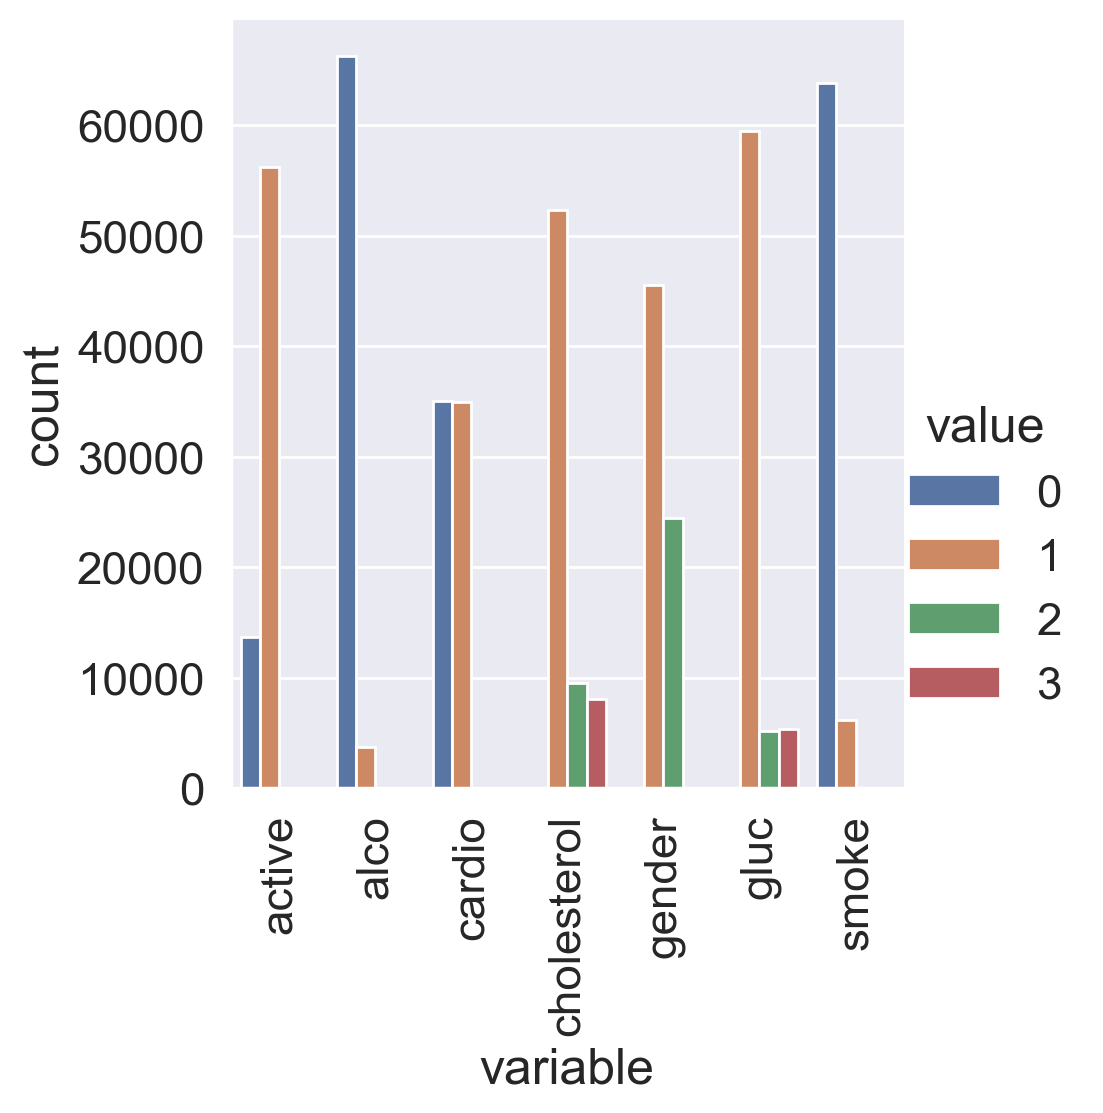

In [4]:
df_uniques = pd.melt(
frame = df,
value_vars = ["gender", "cholesterol", "gluc", "smoke", "alco", 
              "active", "cardio"],
)

df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0,1]).rename(columns={"value":"count"})
    .reset_index()
)

sns.catplot(
x = "variable", y = "count", hue="value", data=df_uniques, kind="bar"
)

plt.xticks(rotation="vertical")

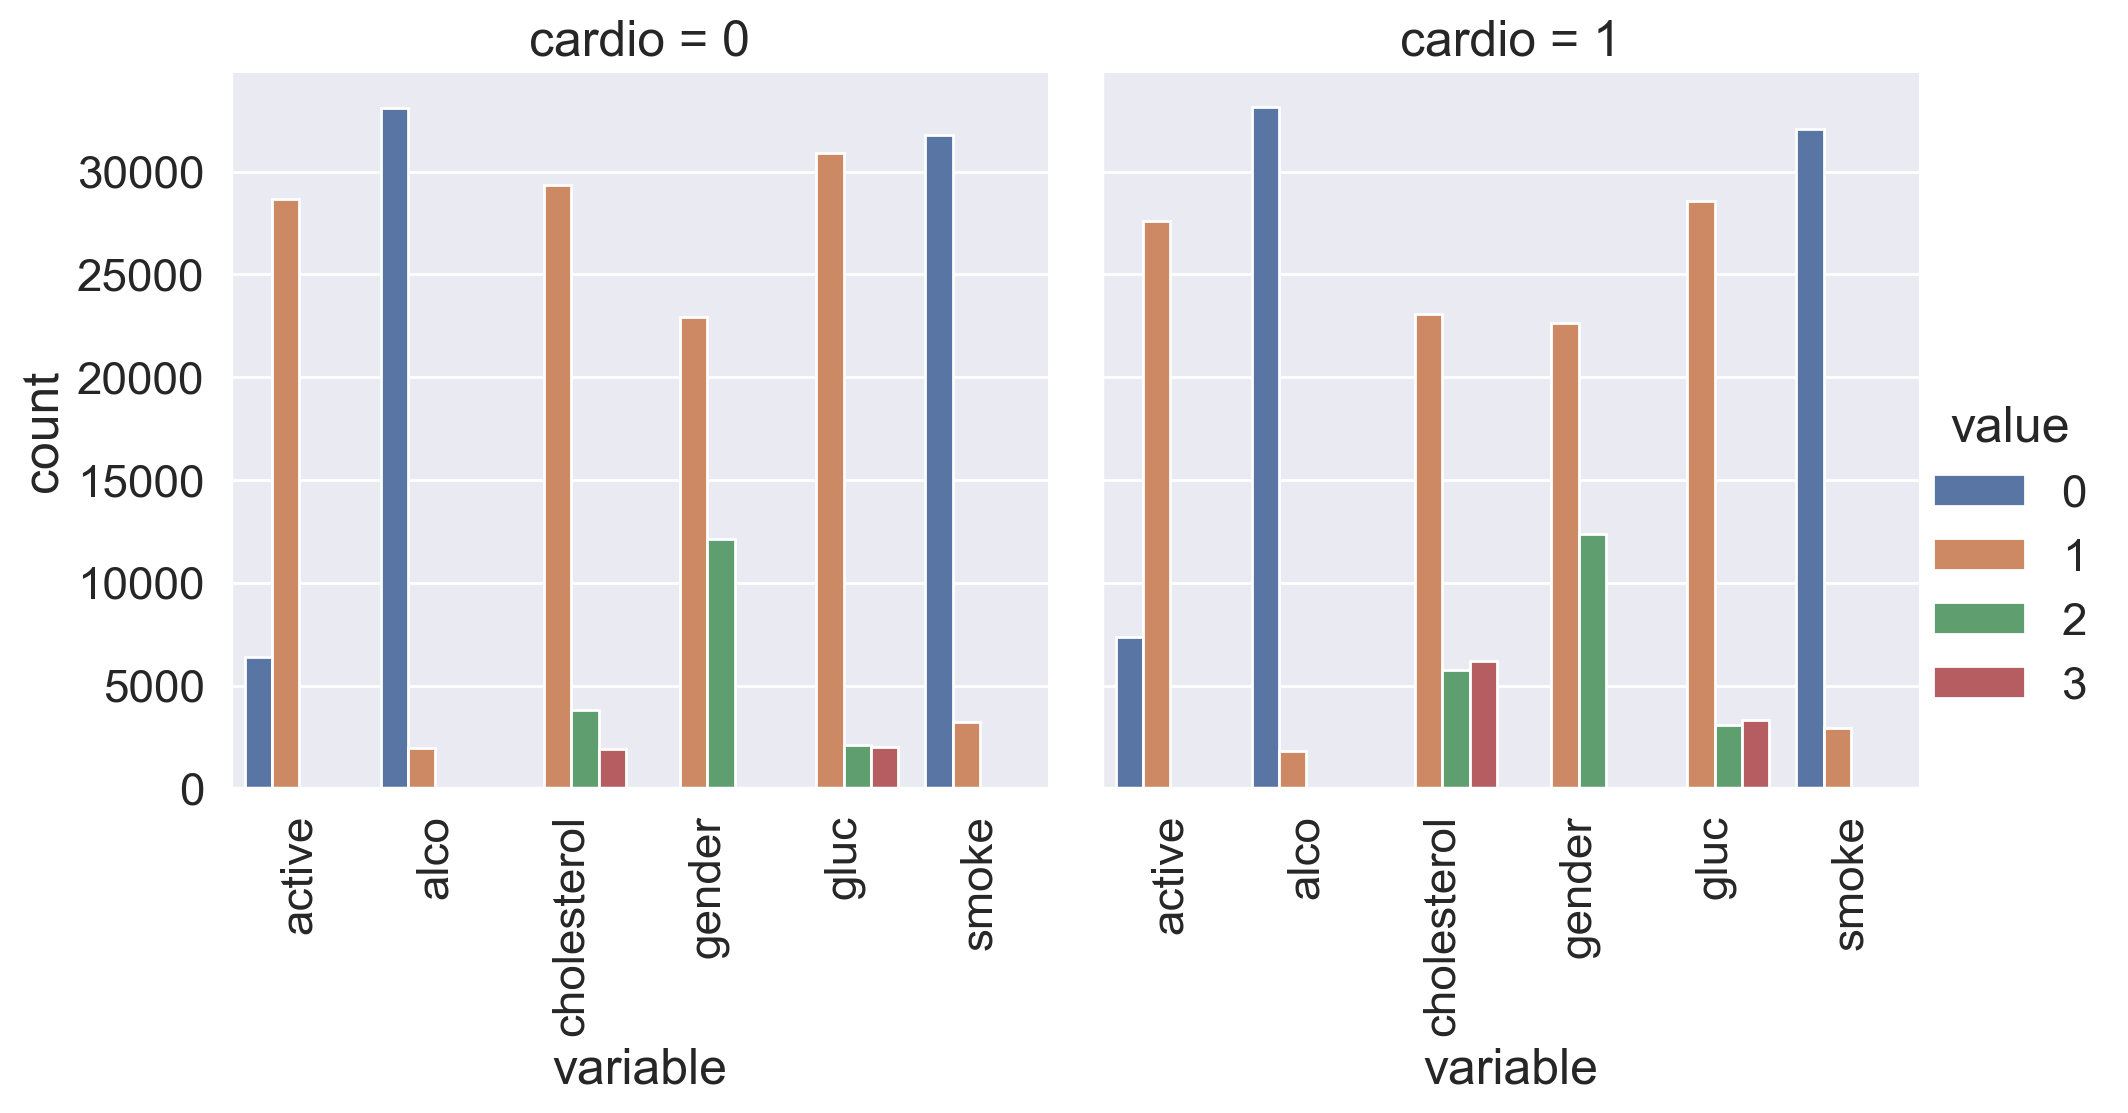

In [5]:
# Visualize the data based on target variable 'cardio'

df_uniques = pd.melt(
frame = df,
value_vars = ["gender","cholesterol","gluc", "smoke","alco","active"],
id_vars = ["cardio"]
)

df_uniques = (
pd.DataFrame(df_uniques.groupby(["variable", "value","cardio"])["value"].count())
    .sort_index(level=[0,1])
    .rename(columns={"value":"count"})
    .reset_index()
)
chart = sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar"
)

# plt.xticks(rotation = 'vertical')
chart.set_xticklabels(rotation = 90)

In [6]:
# Statics for features uniques values

for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
        
    print(10*"-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


####  How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

<Axes: xlabel='gender', ylabel='height'>

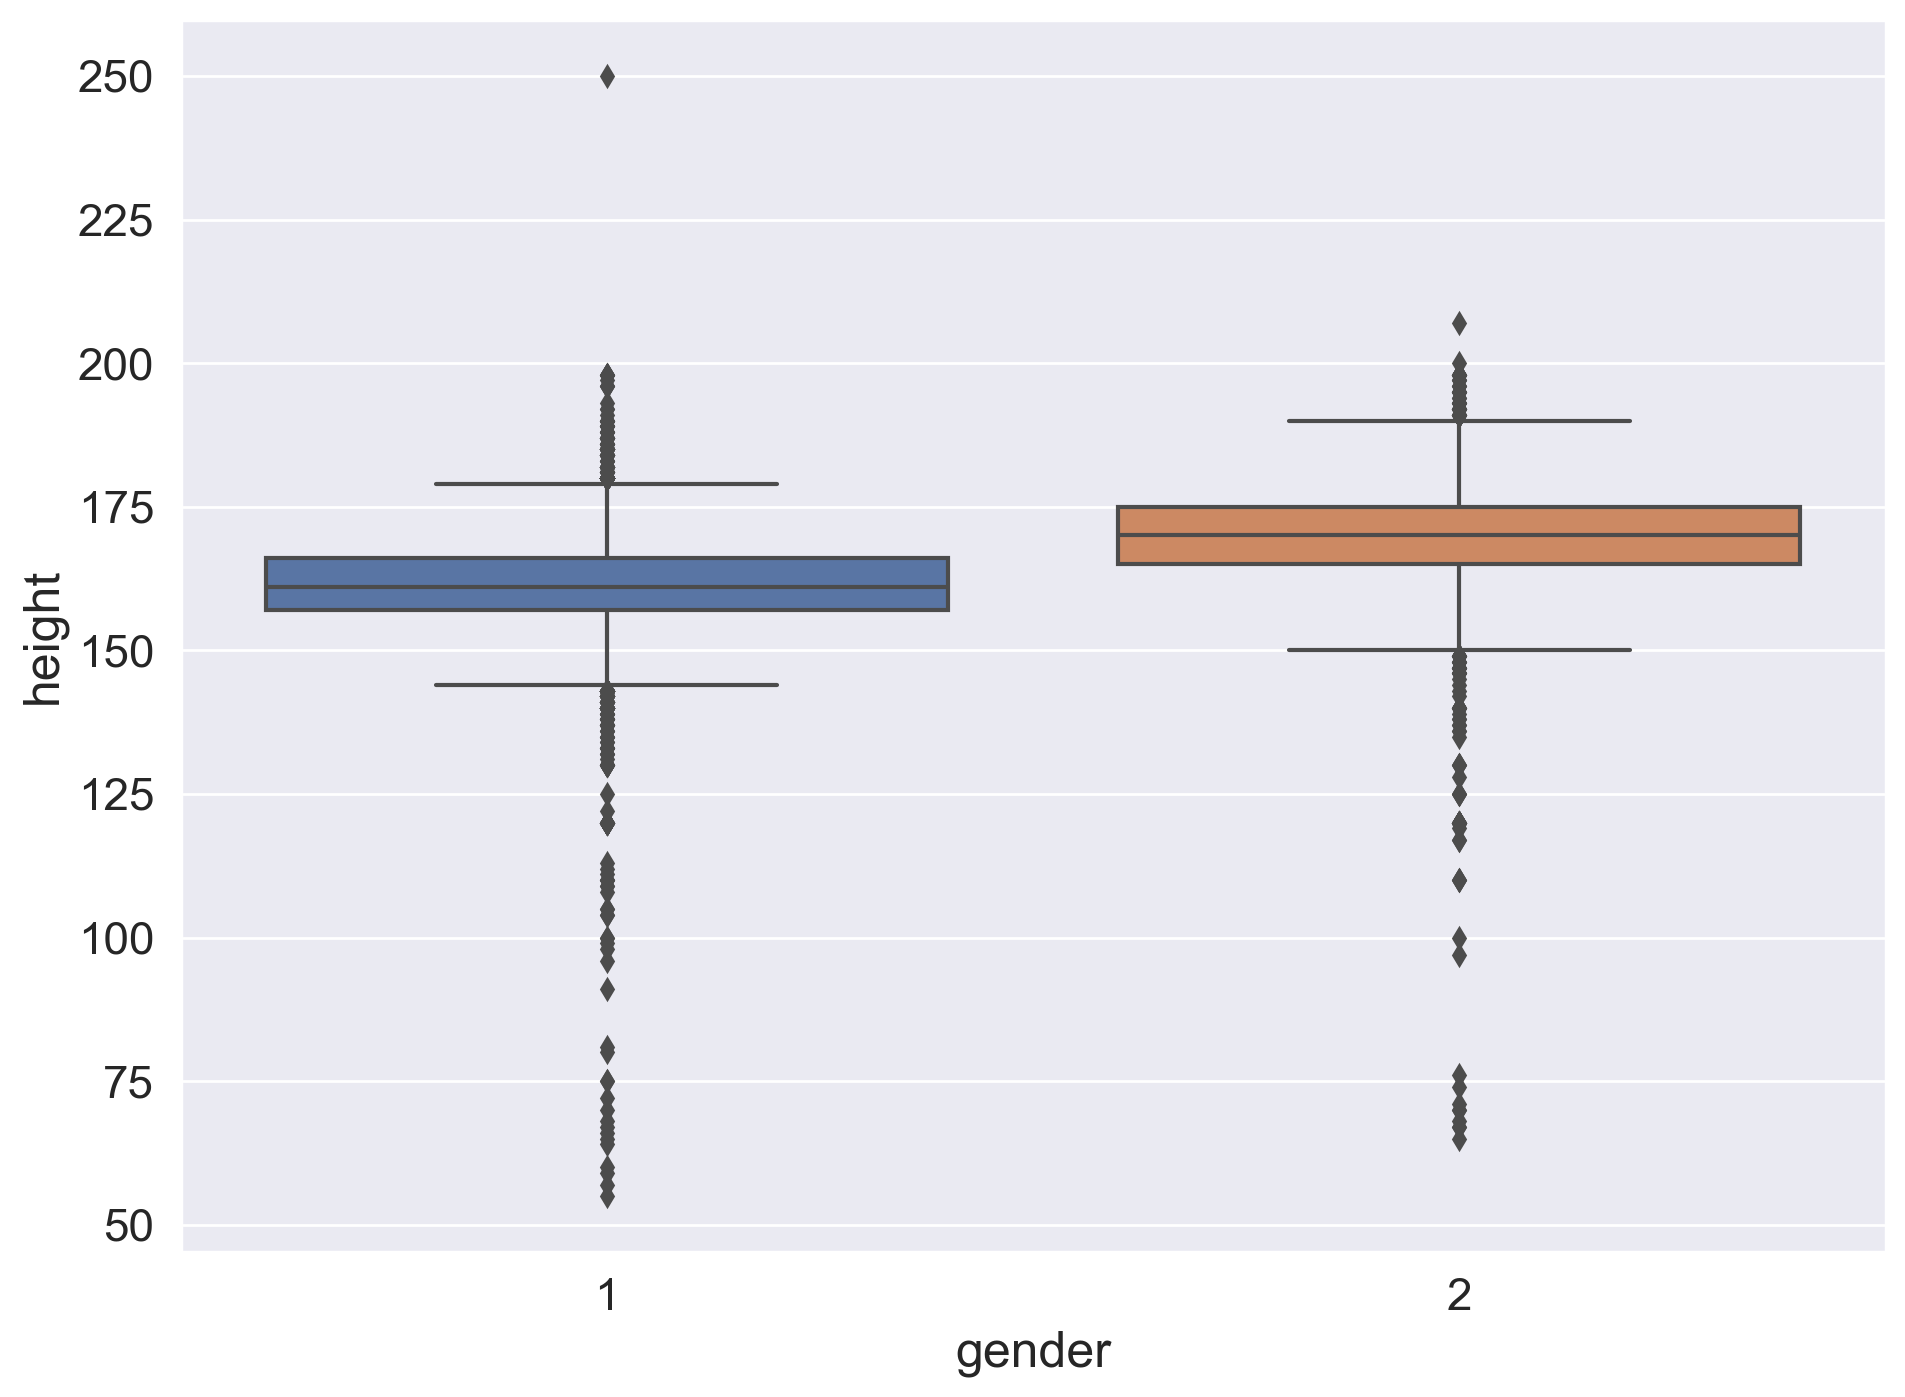

In [7]:
sns.boxplot(x="gender", y = "height", data = df)

In [8]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [9]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

####  Who more often report consuming alcohol – men or women?

<Axes: xlabel='gender', ylabel='count'>

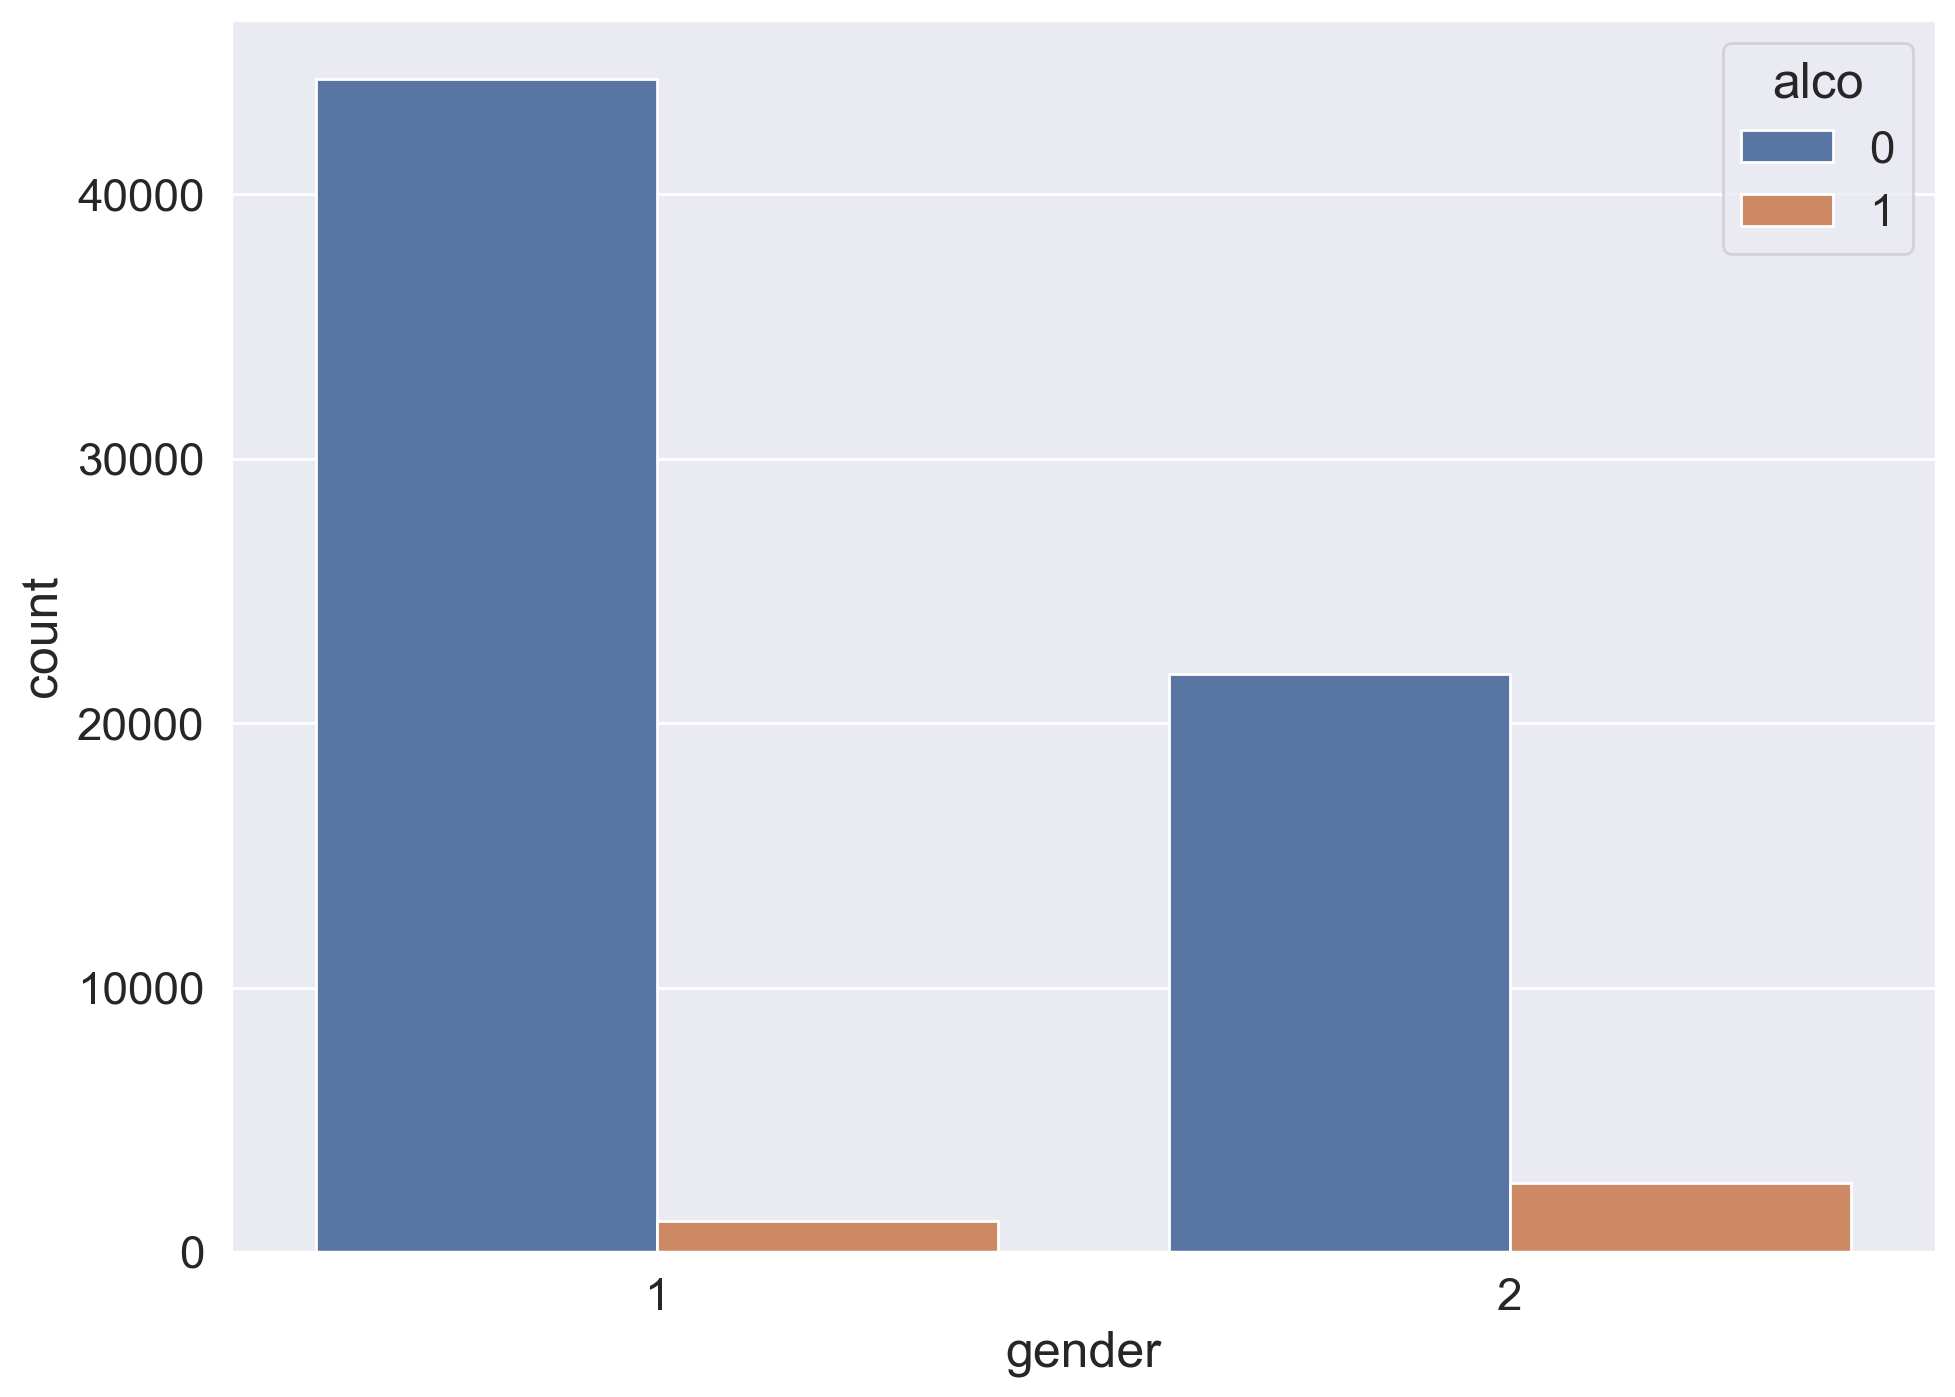

In [10]:
sns.countplot(x="gender", hue = "alco", data = df)

In [11]:
pd.crosstab(df["gender"],df["alco"])

alco,0,1
gender,,
1,44369,1161
2,21867,2603


#### What’s the rounded difference between the percentages of smokers among men and women?



In [12]:
df.groupby('smoke')['gender'].sum()

smoke
0    82945
1    11525
Name: gender, dtype: int64

In [13]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [14]:
45530+24470

70000

In [15]:
pd.crosstab(df["gender"],df["smoke"])

smoke,0,1
gender,,
1,44717,813
2,19114,5356


In [16]:
813+5356

6169

In [17]:
# Percentage of men smokers
(5356/24470)*100

21.88802615447487

In [18]:
# Percentage of women smokers
(813/45530)*100

1.7856358444981333

In [19]:
22-2

20

#### What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

In [20]:
df.groupby('smoke')['age'].median()

smoke
0    19722.0
1    19125.0
Name: age, dtype: float64

In [21]:
19722.0 - 19125.0

597.0

In [22]:
597/30

19.9

#### Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What’s the ratio of these two fractions?



In [23]:
60*30

1800

In [24]:
64*30

1920

In [25]:
df[(df['age'] >= 21900) & (df['age'] <= 23360)].groupby('cardio').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,49465.957291,22524.710555,1.375952,163.673830,72.597633,127.897987,87.548150,1.330794,1.258705,0.079978,0.043254,0.817737
1,50398.715020,22626.038627,1.345700,163.279283,76.092583,134.927192,104.198277,1.614423,1.317077,0.070724,0.042101,0.786161


In [26]:
df_aged = df[(df['age'] >= 21900) & (df['age'] <= 23360)]
df_aged

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0
22,32,23046,1,158,90.0,145,85,2,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69973,99961,22142,2,175,72.0,130,80,1,1,0,0,1,0
69979,99969,22423,1,163,74.0,160,100,2,2,0,0,1,1
69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1


In [27]:
df_aged.groupby(by=['cardio','gender','cholesterol']).count()

id   age  height  weight  ap_hi  ap_lo  gluc  \
cardio gender cholesterol                                                   
0      1      1            1748  1748    1748    1748   1748   1748  1748   
              2             293   293     293     293    293    293   293   
              3             253   253     253     253    253    253   253   
       2      1            1095  1095    1095    1095   1095   1095  1095   
              2             157   157     157     157    157    157   157   
              3             130   130     130     130    130    130   130   
1      1      1            2806  2806    2806    2806   2806   2806  2806   
              2             765   765     765     765    765    765   765   
              3            1138  1138    1138    1138   1138   1138  1138   
       2      1            1624  1624    1624    1624   1624   1624  1624   
              2             347   347     347     347    347    347   347   
              3             517   517     517     517    517    517   517   

                           smoke  alco  active  
cardio gender cholesterol                       
0      1      1             1748  1748    1748  
              2              293   293     293  
              3              253   253     253  
       2      1             1095  1095    1095  
              2              157   157     157  
              3              130   130     130  
1      1      1             2806  2806    2806  
              2              765   765     765  
              3             1138  1138    1138  
       2      1             1624  1624    1624  
              2              347   347     347  
              3              517   517     517

In [28]:
pd.crosstab(df_aged['cardio'],df_aged['gender'])

gender,1,2
cardio,,
0,2294,1382
1,4709,2488


#### Choose the correct statements:

1. Median BMI in the sample is within boundaries of normal values.

2. Women’s BMI is on average higher then men’s.

3. Healthy people have higher median BMI than ill people.

4. In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women